# US Monthly GDP Analysis

#This analysis explores the US monthly GDP growth, identifying recessions and visualizing their duration and severity.

## Monthly GDP Growth Heatmap

import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio

pio.templates.default = "plotly_white"

data = pd.read_csv(r'C:\Users\vaish\Downloads\US_monthly_gdp.csv')
print(data.head())
fig = go.Figure(data=go.Heatmap(
    z=[data['GDP Growth']],
    x=data.index,
    y=['GDP Growth'],
    colorscale='Inferno'))

fig.update_layout(title='GDP Growth over Time',
                  xaxis_title='Time Period',
                  yaxis_title='')

fig.show()

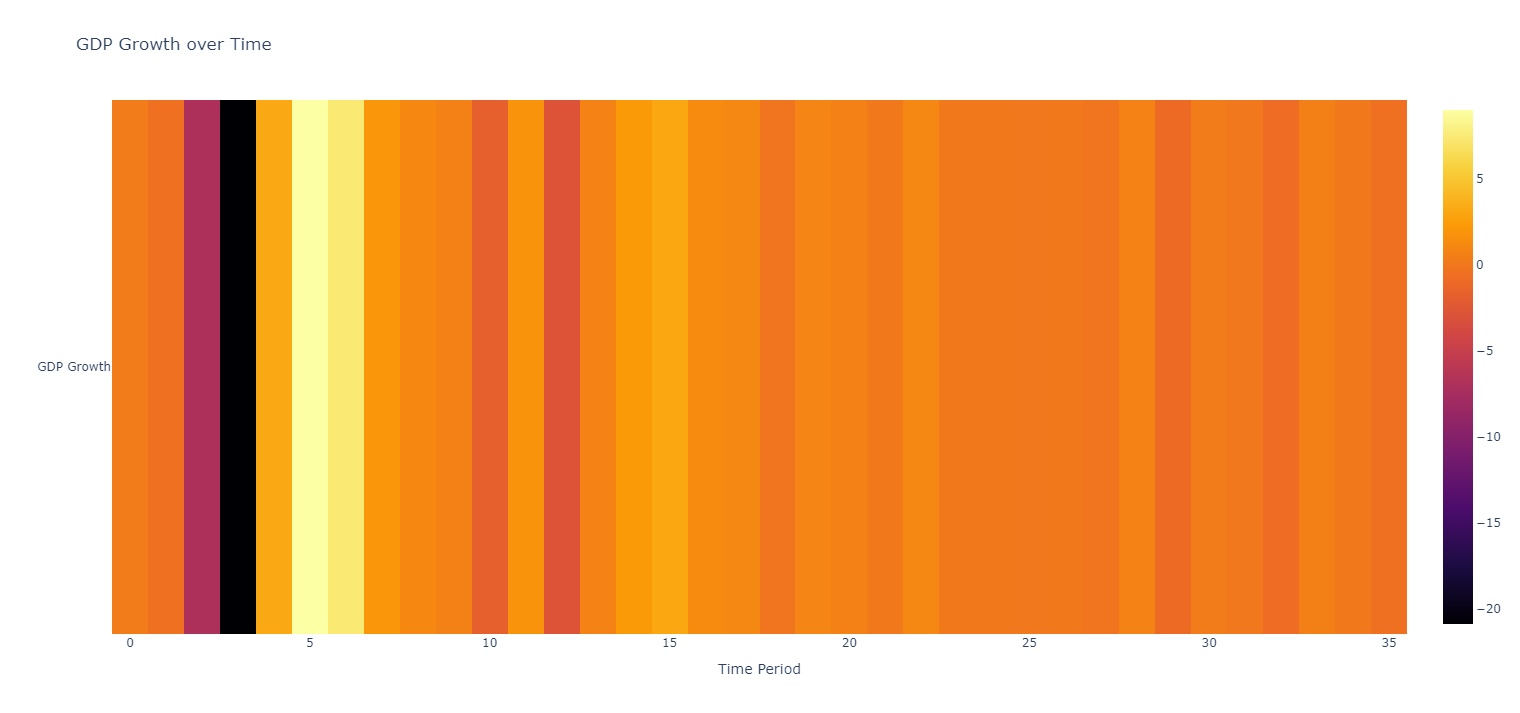


#import neccsary libraries
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_white"
data = pd.read_csv(r'C:\Users\vaish\Downloads\US_monthly_gdp.csv')
data['Time Period'] = pd.to_datetime(data['Time Period'], format='/%m/%Y')
data.set_index('Time Period', inplace=True)
quarterly_data = data.resample('Q').mean()
print(quarterly_data.head())

# Calculate recession based on quarterly GDP growth
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index,
                         y=quarterly_data['GDP Growth'],
                         name='GDP Growth',
                         line=dict(color='Blue', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index,
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'],
                         name='Recession', line=dict(color='green', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')
fig.show()
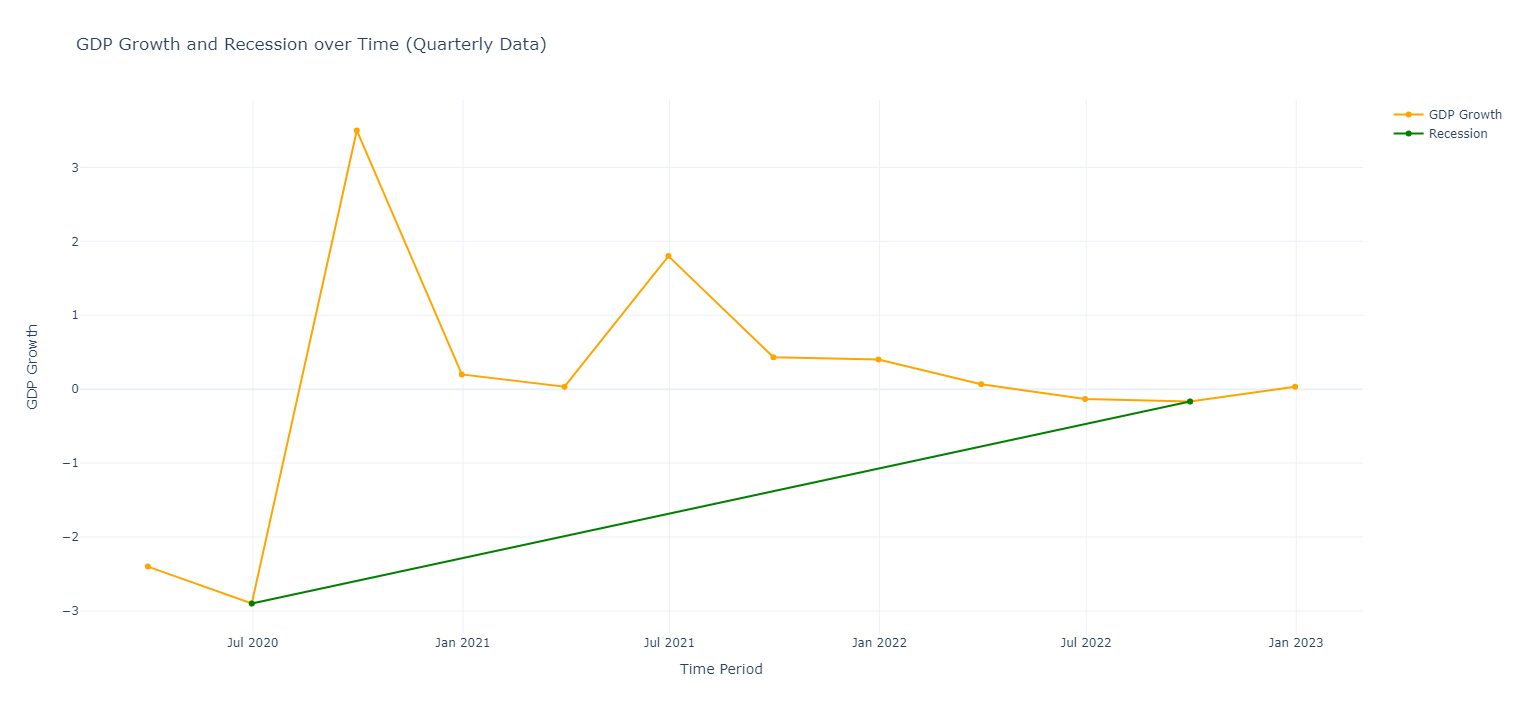

## Duration and Severity of Recession

quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()
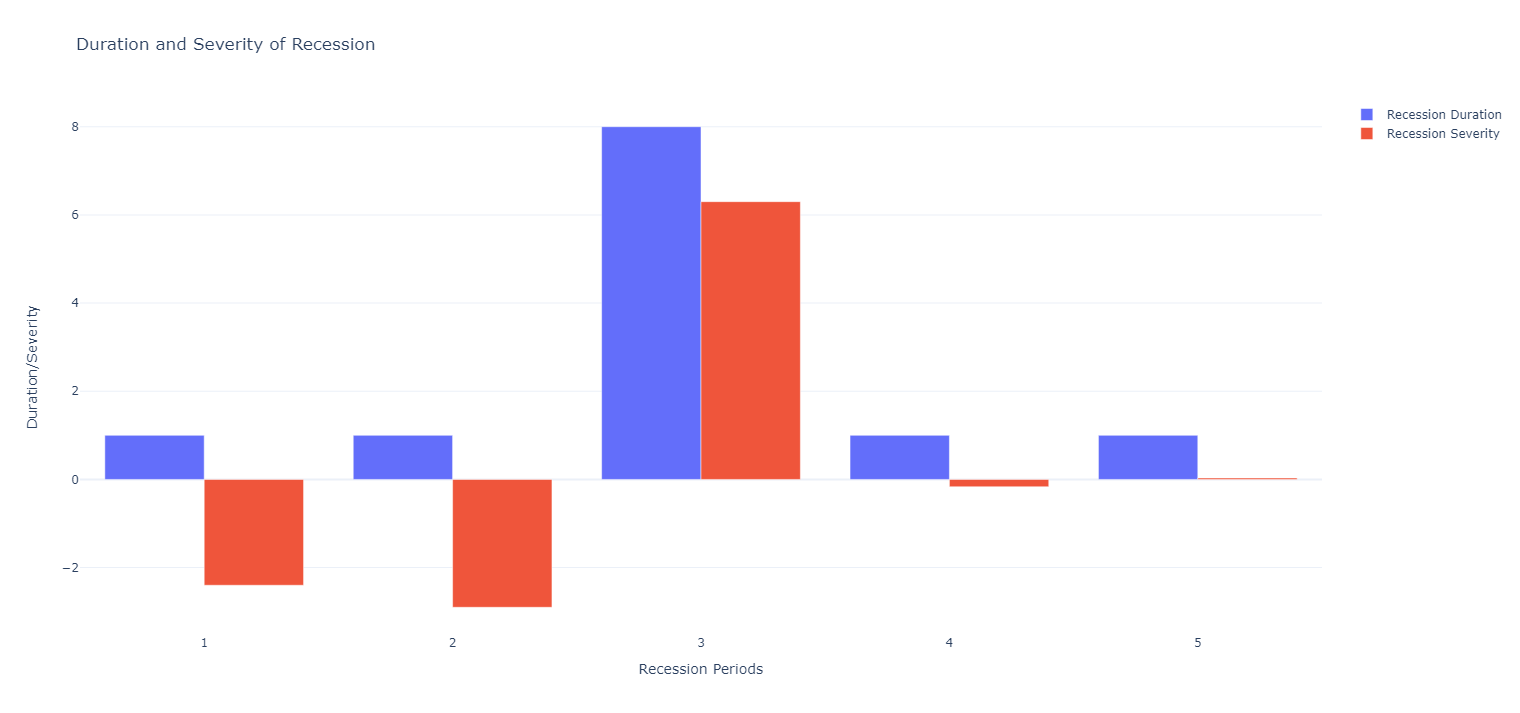